## Optimization: 3D

Write a program that can find the minimum of a function that you define. The function can be any one (even very simple) as long as it actually has a minimum. You are welcome to use any standard or external C++ or Python libraries (you don't need to implement the minimization routine, only the function to be minimized). You can also try to visualize your function and the location of the minimum (not required).



In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

In [151]:
#Define my function
def Funct(x,y):
    Valz = np.sin(y)*np.sin(x)
    return Valz

In [152]:
#Prelimiary work to find the minimum
upper = -2
lower = 2
x0 = np.arange(upper, lower, 0.1)
y0 = np.arange(upper, lower, 0.1)
X, Y = np.meshgrid(x0, y0)
Z = Funct(X, Y)

min_val = np.where(Z == Z.min()) # where [0] and [1] rows and coloumbs respectively 
listOfCoordinates = list(zip(min_val[0], min_val[1])) # (x,y) of the coordinates

print("A minimum value is given by: "+str(Z.min())+'\n')

print(listOfCoordinates[0])
print("This corresponds to: (x,y)=" + str(x0[listOfCoordinates[0][0]]) +" and "+str(y0[listOfCoordinates[0][1]])+'\n')
print(listOfCoordinates[1])
print("This corresponds to: (x,y)=" + str(x0[listOfCoordinates[1][0]]) +" and "+str(y0[listOfCoordinates[1][1]])+'\n')
print("Our minimizer should give us the same thing.")


A minimum value is given by: -0.9991473878973766

(4, 36)
This corresponds to: (x,y)=-1.5999999999999996 and 1.6000000000000032

(36, 4)
This corresponds to: (x,y)=1.6000000000000032 and -1.5999999999999996

Our minimizer should give us the same thing.


<IPython.core.display.Javascript object>


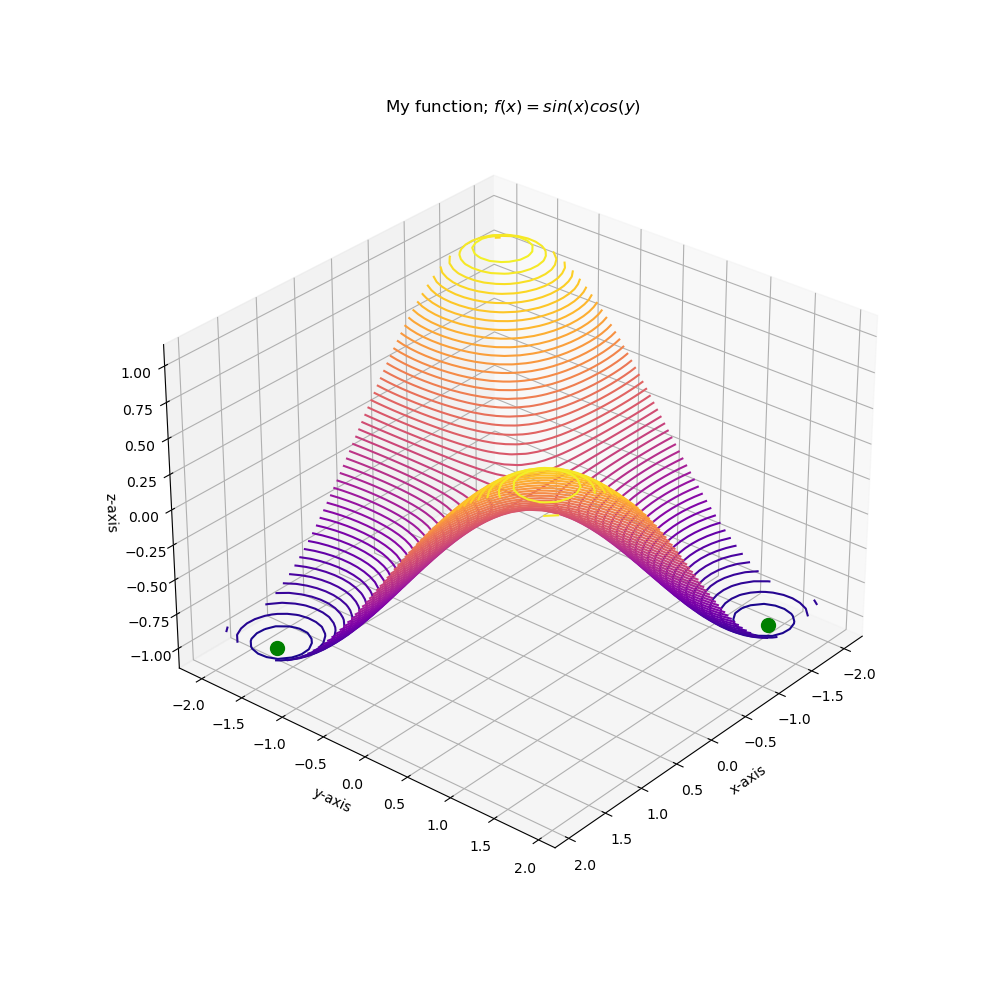

In [156]:
#Ploting fucntion without the minimum
%matplotlib notebook

xmin_1 = x0[listOfCoordinates[0][0]]
ymin_1 = y0[listOfCoordinates[0][1]]

xmin_2 = x0[listOfCoordinates[1][0]]
ymin_2 = y0[listOfCoordinates[1][1]]

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='plasma')
ax.scatter3D(xmin_1, ymin_1, [Funct(xmin_1, ymin_1)], s=[100], c="g");
ax.scatter3D(xmin_2, ymin_2, [Funct(xmin_2, ymin_2)], s=[100], c="g");
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('My function; $f(x) =sin(x)cos(y)$')
plt.show()

for angle in range(0, 360):
    ax.view_init(30, 40)

# We now optimize our function:

In [123]:
# optimization x
optimization = optimize.minimize(Funct, [-1.5], args=(-1.5,),method='Nelder-Mead') 
best_x = optimization.x
print(optimization)

# optimization y
print('\n')
optimization = optimize.minimize(lambda x,y: Funct(y,x), [-1.6], args=(1.6,),method='Nelder-Mead')
best_y = optimization.x
print(optimization)
print('\n')

print(best_x)
print(best_y)


 final_simplex: (array([[1.5708252 ],
       [1.57075195]]), array([-0.99749499, -0.99749499]))
           fun: -0.9974949861884026
       message: 'Optimization terminated successfully.'
          nfev: 40
           nit: 20
        status: 0
       success: True
             x: array([1.5708252])


 final_simplex: (array([[-1.57078125],
       [-1.57085938]]), array([-0.9995736, -0.9995736]))
           fun: -0.9995736029278988
       message: 'Optimization terminated successfully.'
          nfev: 22
           nit: 11
        status: 0
       success: True
             x: array([-1.57078125])


[1.5708252]
[-1.57078125]


<IPython.core.display.Javascript object>


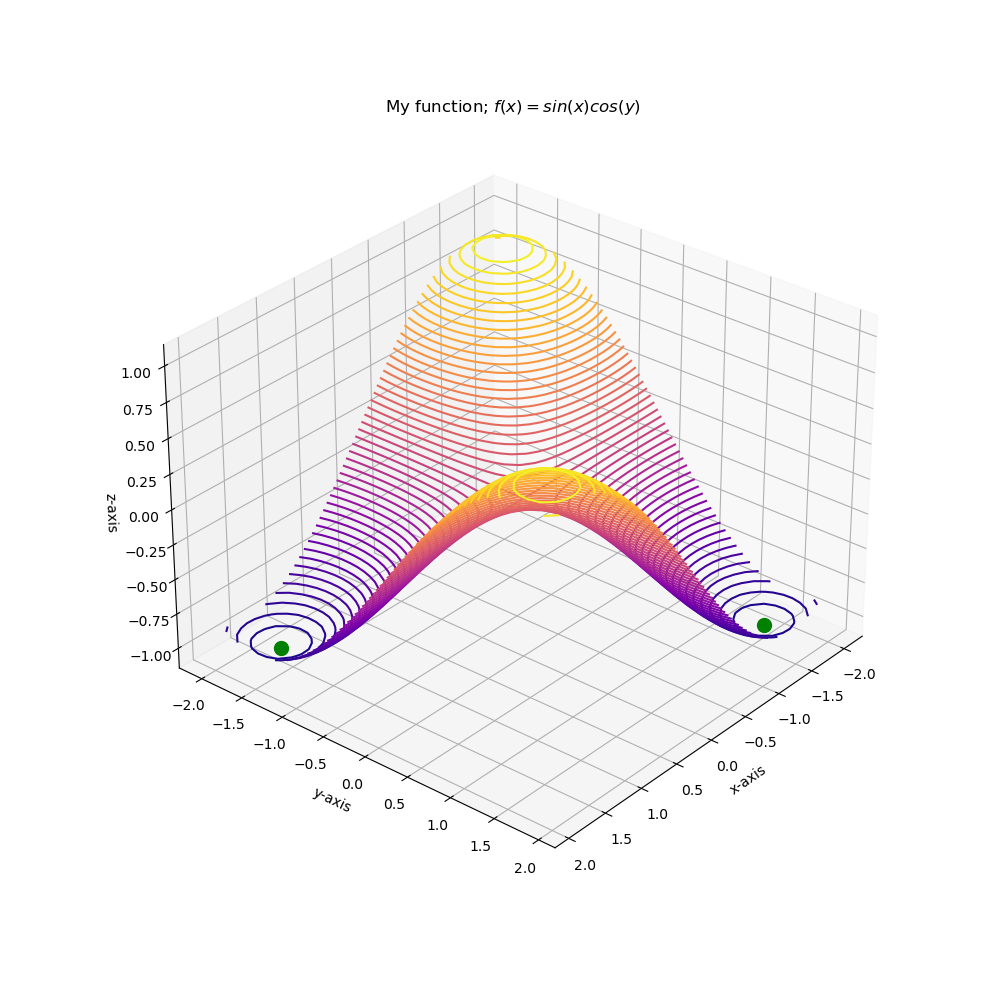

In [157]:
#Plots with values found from minimizer

%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='plasma')
ax.scatter3D([best_x], [best_y], [Funct(best_x, best_y)], s=[100], c="g");
ax.scatter3D([-best_x], [-best_y], [Funct(best_x, best_y)], s=[100], c="g");
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('My function; $f(x) =sin(x)cos(y)$')
plt.show()

for angle in range(0, 360):
    ax.view_init(30, 40)

# Note that the values found from the two methods aren't exactly the same, differing by less than a percent or so. Moreover, it should be noted that I had to pick the starting point as close to the minimum. Otherwise, the errors would be worst.